## Generating data

In [1]:
from codes import data

In [2]:
seq_start     = 0
seq_end       = 40
seq_len       = 1000
noise_level   = 0.2 # normal fluctuation of the sequence
anomaly_prob  = 0.02 # probability of anomaly appearing
anomaly_level = 5 # how abnormal an anomaly is

fake_data     = data.FakeData(seq_start, seq_end, seq_len, noise_level, anomaly_prob, anomaly_level)

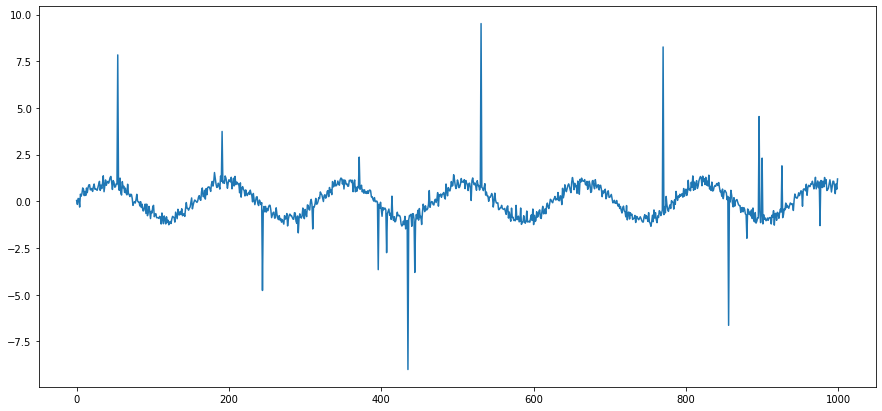

In [3]:
fake_data.plot(normal=False) # if normal == True, the function will plot sequence without anomalies

## Training model

In [4]:
from codes import model as m
import keras
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
lags = 100 # number of lags used to predict current value

In [6]:
x, y = fake_data.generate_training_data(seq_len=lags)
print(x.shape)

(900, 100, 1)


In [25]:
model = m.get_model(seq_len=lags)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 1)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 91, 3)             33        
_________________________________________________________________
flatten_4 (Flatten)          (None, 273)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1370      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [26]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

In [27]:
batch_size = 128
no_epochs = 100
validation_split = 0.2

checkpoint = ModelCheckpoint(
    "models/best_model.hdf5", monitor='val_loss', verbose=0, save_best_only=True, mode='auto', period=1
)

# start training
history = model.fit(
    x, y, 
    epochs = no_epochs, batch_size = batch_size, verbose=0, 
    validation_split = validation_split, callbacks=[checkpoint]
)

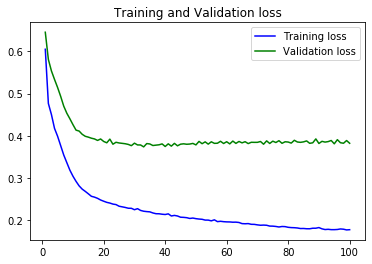

In [28]:
# visualization of training and validation loss 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## Detecting Anomaly

In [29]:
detector = m.AnomalyDetector(model, x, y)

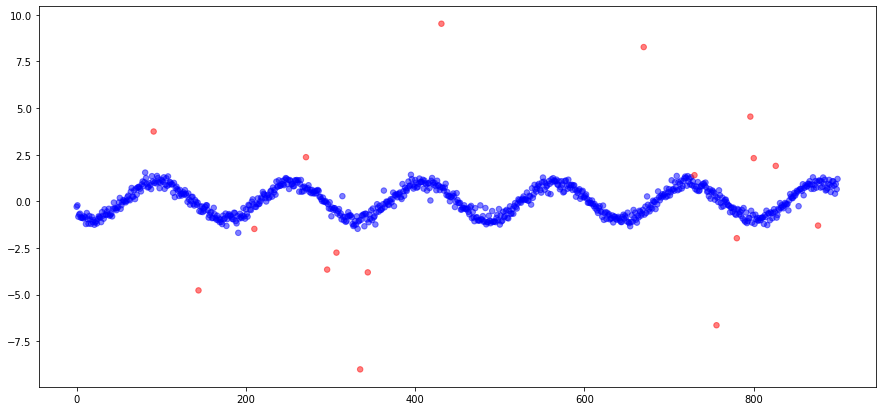

In [30]:
detector.plot(
    threshold=0.9, # data point exceeding loss threshold will be flagged as anomaly marked red 
    size=30 # size of the point in the plot
)